<a href="https://colab.research.google.com/github/rushilg13/Skillship-Task-1/blob/main/DataScience-Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Review: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>

<a id='intro'></a>
## Introduction

> * The data set is Medical Appointment No shows. <br>
> * The data set variables are self explanatory. The variables in the data set are 'Patient ID', 'AppointmentID', 'Gender', 'ScheduleDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-Show'. <br>
> * No-Show as Yes corresponds to people who did not turn up for the doctor visit and No-Show as No turned up for the doctor visit.

## Important information:

1. Explain your findings and the steps you've followed using the Markdown cells. Create Markdown cells wherever necessary
2. Double-click the markdown cells to edit them and add your inferences
3. Add necessary code cells for your task. You are not restricted to the cells created before hand.


### Steps to be followed:
1. Load the data
2. Variable Identification.
3. Check for cleanliness.
4. Trim and clean the data.
5. Feature Selection.
6. Modification of features if needed.


In [141]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import seaborn as sb


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### Loading the data

In [144]:
# Load your data and print out a few lines. Perform operations to inspect data types and look for instances of missing or possibly errant data.
from google.colab import files
uploaded = files.upload()


Saving KaggleV2-May-2016.csv to KaggleV2-May-2016 (1).csv


In [145]:
import io
df= pd.read_csv(io.BytesIO(uploaded['KaggleV2-May-2016.csv']))

# Dataset is now stored in a Pandas Dataframe

In [146]:
df.head() # Print a few lines

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [147]:
#looking for missing instances

df.count()# counts number of records under each attribute
df.shape[0]# Number of entry in dataset
flag=0
cols= list(df.columns)
for col in cols:
    if(df.shape[0]==df[col].count()):
        flag=1
if(flag==1):
    print("No Data Entry Missing")
else:
    print("Data Entry Missing")

No Data Entry Missing


In [148]:
count=0
if df.isnull==True:
    count+=1

if count==0:
    print("No null values")
else:
    print("Null Values found")

# Finding if any null value present

No null values


In [149]:
df.info()  #Data types count not-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [150]:

col_list=list(df.columns)  # Finding Datatype in form of dictionary
d_list=[]
for col in cols:
    # print(df[col].dtypes)
    d_list.append(df[col].dtypes) 
d_type = dict(zip(col_list, d_list))
d_type


{'Age': dtype('int64'),
 'Alcoholism': dtype('int64'),
 'AppointmentDay': dtype('O'),
 'AppointmentID': dtype('int64'),
 'Diabetes': dtype('int64'),
 'Gender': dtype('O'),
 'Handcap': dtype('int64'),
 'Hipertension': dtype('int64'),
 'Neighbourhood': dtype('O'),
 'No-show': dtype('O'),
 'PatientId': dtype('float64'),
 'SMS_received': dtype('int64'),
 'ScheduledDay': dtype('O'),
 'Scholarship': dtype('int64')}

In [151]:
# Create a summary of the data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimum age in the dataset is negative(something to be taken care of) and max age is above 100.

In [152]:
# ages_bool = list(df.Age<0)
# for age_bool in ages_bool:
#     if(age_bool==True):
#         index =ages_bool.index(age_bool)
#         print(index)
# list(df.Age)[99832] = df['Age'].mean()
# # print(list(df.Age)[99832])
# df['Age'].mean()                              Could have replaced with mean too


#Alternate Approach
df = df[df.Age >= 0] #deleting negative value of age 
df = df[df.Age <= 100] #deleting value of age >100

In [153]:
ages_bool = list(df.Age<0)
for age_bool in ages_bool:
    if(age_bool==True):
        flag=0
    else:
        flag=1
if(flag==0):
    print("Negative age found")
else:
    print("Negative ages deleted")

Negative ages deleted


### Variable Identification
* Identifying the target variable(dependent variable) and the predictor variables(independent variables) which affect the status of the target variable.

In [154]:
# print(df.shape)
# y = df['No-show'] # dependent Variable = NoShow
# x = df.iloc[ :, :13] #  independent Variable
# # Will drop AppointmentID and PatientID later

In [155]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

#### Mention your target variable(s) in this markdown cell and specify the predictor variable(s) you'll use for the analysis

### Type of Variable Classified:
#### Predictor Variables: 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap' 'SMS_received'

<br>

#### Target Variable (Independent Variable): 'No-show'

<br>

### Classify the features based on dataype

In [156]:
# Check the data types of each column (features)
df.info()

# for col in cols:
#     print(df[col].dtypes) Finding out data types


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110519 non-null  float64
 1   AppointmentID   110519 non-null  int64  
 2   Gender          110519 non-null  object 
 3   ScheduledDay    110519 non-null  object 
 4   AppointmentDay  110519 non-null  object 
 5   Age             110519 non-null  int64  
 6   Neighbourhood   110519 non-null  object 
 7   Scholarship     110519 non-null  int64  
 8   Hipertension    110519 non-null  int64  
 9   Diabetes        110519 non-null  int64  
 10  Alcoholism      110519 non-null  int64  
 11  Handcap         110519 non-null  int64  
 12  SMS_received    110519 non-null  int64  
 13  No-show         110519 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [157]:
col_list=list(df.columns)
d_list=[]
for col in cols:
    # print(df[col].dtypes)
    d_list.append(df[col].dtypes) # Finding out data types
d_type = dict(zip(col_list, d_list))
df.groupby(df.dtypes, axis=1)

### Write the features categorized by data types here:
### Data Types

<br>

### Checking for missing data

In [158]:
count=0
if df.isnull==True:
    count+=1
print(count)
if count==0:
    print("No Missing Value")

0
No Missing Value


Are there any missing data? _(Answer here)_ : No missing Values


#### Check the counts of some categorical variables and give your inference

In [159]:
df.shape # (110519, 12)
df['No-show'].count() #No missing Value

110519

In [160]:
df.shape # (110519, 12)
df['Neighbourhood'].count() #No missing Value

110519

In [161]:
df.shape # (110519, 12)
df['Gender'].count() #No missing Value

110519

<a id='cleaning'></a>
## Data Cleaning

#### The changes made to date format.
1. The Scheduled and Appointment days are in date time format.
2. Convert the date time format to Date, Week day and Month Scheduled.
3. Days, Month should normal count in integer.
4. The Week day should be coded as Monday : 0 to Sunday : 6
5. As the dataset is of year 2016, the year can be ignored.

Hint : This can be done using NumPy's datetime64 (https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

In [165]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [168]:
# Get Day of the Week for ScheduledDay and AppointmentDay
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()

In [169]:
df['AppointmentDay'] = np.where((df['AppointmentDay'] - df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])
# Get the Waiting Time in Days of the Patients.
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days

In [170]:
print("There are [{}] records where the Waiting Time is less than Zero.".format(df[df.Waiting_Time_days < 0].shape[0]))

There are [0] records where the Waiting Time is less than Zero.


* Some of the spellings of the columns are incorrect.
* Correcting them will make it easier for the users to follow.

In [172]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDay_DOW', 'AppointmentDay_DOW', 'Waiting_Time_days'],
      dtype='object')

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [173]:
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'}, inplace=True)

### Check the unique values for each column.
Certain values might be of wrong format or deosn't make sense with regard to the feature. Identify and correct them if any. 

Add any number of cells you think are necessary in this section

In [174]:
cols=list(df.columns)
for col in cols:
    print(col)
    print(df[col].unique())
    print("\n")
df.info()

PatientId
[2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]


AppointmentID
[5642903 5642503 5642549 ... 5630692 5630323 5629448]


Gender
['F' 'M']


ScheduledDay
['2016-04-29T00:00:00.000000000' '2016-04-27T00:00:00.000000000'
 '2016-04-26T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-04-25T00:00:00.000000000' '2016-04-20T00:00:00.000000000'
 '2016-03-31T00:00:00.000000000' '2016-04-19T00:00:00.000000000'
 '2016-04-06T00:00:00.000000000' '2016-04-18T00:00:00.000000000'
 '2016-04-11T00:00:00.000000000' '2016-04-12T00:00:00.000000000'
 '2016-04-15T00:00:00.000000000' '2016-04-01T00:00:00.000000000'
 '2016-04-05T00:00:00.000000000' '2016-04-08T00:00:00.000000000'
 '2016-04-14T00:00:00.000000000' '2016-04-13T00:00:00.000000000'
 '2016-04-07T00:00:00.000000000' '2016-03-17T00:00:00.000000000'
 '2016-03-30T00:00:00.000000000' '2016-03-29T00:00:00.000000000'
 '2016-03-18T00:00:00.000000000' '2016-03-28T00:00:00.000000000'
 '2016-03

In [175]:
count=0
for i in list(df.Age):
    if i==0:
        count+=1
        df.Hypertension=0
        df.Diabetes=0
        df.Alcoholism=0
print(count)     #3539 Patients


3539


# As we have patients with Age equal to 0 we are assuming that these are the small babies with few months of Age. Usually as babies doesn't have Hypertension or Diabetes or Alcoholism we will check these features for the above records to see if our assumption is correct.

Write your findings **here**

# As we have 3539 patients with Age equal to 0 we are assuming that these are the small babies with few months of Age. Usually as babies doesn't have Hypertension or Diabetes or Alcoholism we will check these features for the above records to see if our assumption is correct.

### Feature Selection

Choose the features that are best suited for the analysis and drop those which are unnecessary.

Display your final dataset at the end


In [176]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [177]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0


AppointmentDay should be on or after the ScheduledDay. Below we will check if there are any records where there is an inconsistency. In case if the ScheduledDay is after the AppointmentDay we will consider it as an error and correct the ScheduledDay to the AppointmentDay.

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Gender              110519 non-null  object        
 1   ScheduledDay        110519 non-null  datetime64[ns]
 2   AppointmentDay      110519 non-null  datetime64[ns]
 3   Age                 110519 non-null  int64         
 4   Neighbourhood       110519 non-null  object        
 5   Scholarship         110519 non-null  int64         
 6   Hypertension        110519 non-null  int64         
 7   Diabetes            110519 non-null  int64         
 8   Alcoholism          110519 non-null  int64         
 9   Handicap            110519 non-null  int64         
 10  SMSReceived         110519 non-null  int64         
 11  NoShow              110519 non-null  object        
 12  ScheduledDay_DOW    110519 non-null  object        
 13  AppointmentDay_DOW  110519 no

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

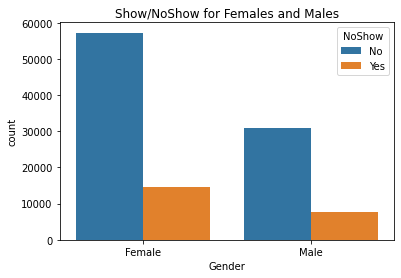

In [181]:
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

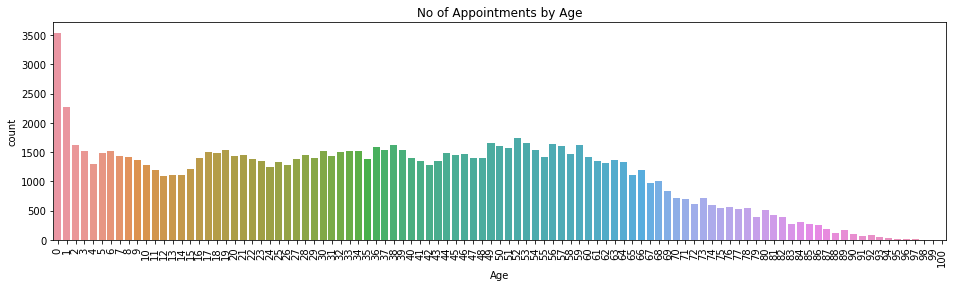

In [182]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of Appointments by Age")
plt.show()

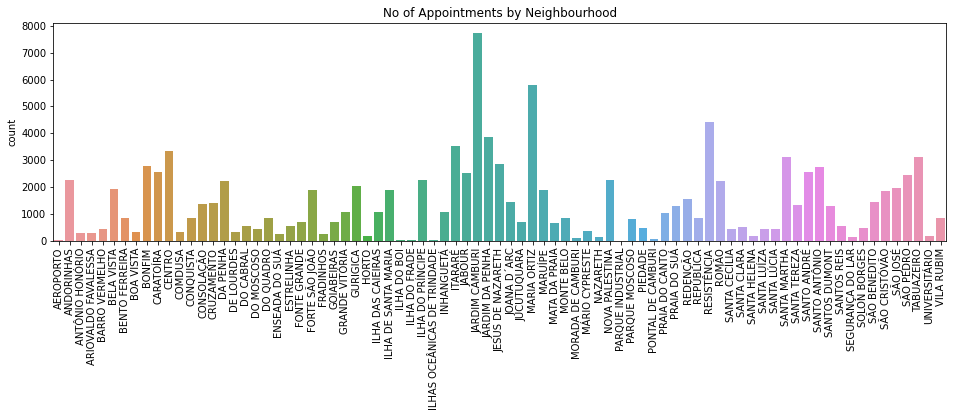

In [183]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(df.Neighbourhood))
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

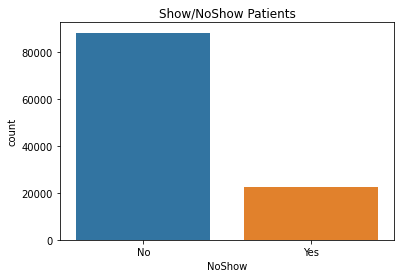

In [184]:
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

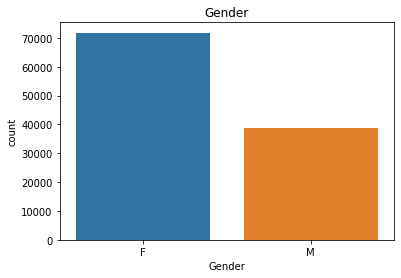

In [185]:
ax = sns.countplot(x=df.Gender, data=df)
ax.set_title("Gender")
plt.show()

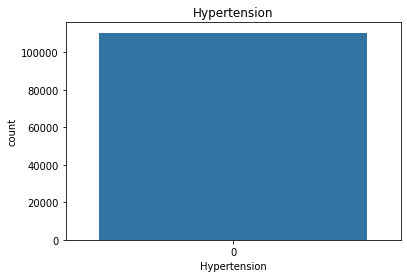

In [186]:
ax = sns.countplot(x=df.Hypertension, data=df)
ax.set_title("Hypertension")
plt.show()

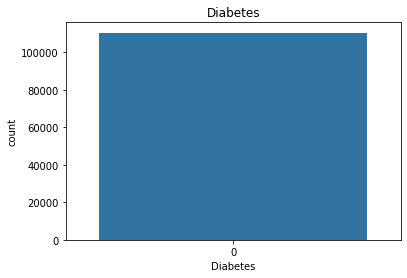

In [187]:
 ax = sns.countplot(x=df.Diabetes, data=df)
ax.set_title("Diabetes")
plt.show()

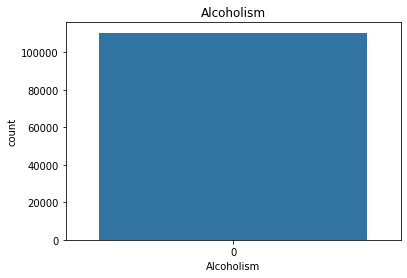

In [188]:
 ax = sns.countplot(x=df.Alcoholism, data=df)
ax.set_title("Alcoholism")
plt.show()

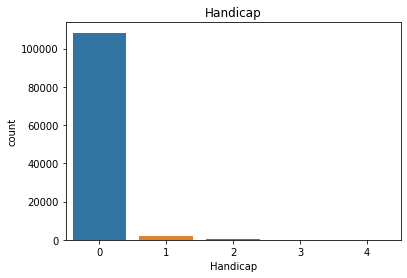

In [189]:
 ax = sns.countplot(x=df.Handicap, data=df)
ax.set_title("Handicap")
plt.show()

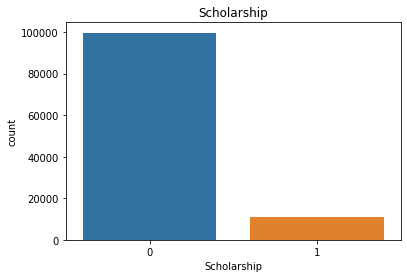

In [190]:
 ax = sns.countplot(x=df.Scholarship, data=df)
ax.set_title("Scholarship")
plt.show()


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [192]:
#Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
#Neighbourhood
le = LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])
#ScheduledDay_DOW
le = LabelEncoder()
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DOW'])
#AppointmentDay_DOW
le = LabelEncoder()
df['AppointmentDay_DOW'] = le.fit_transform(df['AppointmentDay_DOW'])
print("LabelEncoder Completed")

#NoShow
le = LabelEncoder()
df['NoShow'] = le.fit_transform(df['NoShow'])

LabelEncoder Completed


In [193]:
df['ScheduledDay_Y'] = df['ScheduledDay'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay'].dt.day
df.drop(['ScheduledDay'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['AppointmentDay'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay'].dt.day
df.drop(['AppointmentDay'], axis=1, inplace=True)

In [195]:
df.drop(columns=['AppointmentDay_Y','ScheduledDay_Y'], inplace=True)

In [196]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_M,ScheduledDay_D,AppointmentDay_M,AppointmentDay_D
0,0,62,39,0,0,0,0,0,0,0,0,0,0,4,29,4,29
1,1,56,39,0,0,0,0,0,0,0,0,0,0,4,29,4,29
2,0,62,45,0,0,0,0,0,0,0,0,0,0,4,29,4,29
3,0,8,54,0,0,0,0,0,0,0,0,0,0,4,29,4,29
4,0,56,39,0,0,0,0,0,0,0,0,0,0,4,29,4,29


In [198]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,ScheduledDay_DOW,AppointmentDay_DOW,Waiting_Time_days,ScheduledDay_M,ScheduledDay_D,AppointmentDay_M,AppointmentDay_D
0,0,62,39,0,0,0,0,0,0,0,0,0,0,4,29,4,29
1,1,56,39,0,0,0,0,0,0,0,0,0,0,4,29,4,29
2,0,62,45,0,0,0,0,0,0,0,0,0,0,4,29,4,29
3,0,8,54,0,0,0,0,0,0,0,0,0,0,4,29,4,29
4,0,56,39,0,0,0,0,0,0,0,0,0,0,4,29,4,29


In [206]:
y = df['NoShow']

KeyError: ignored

In [204]:
df.drop(columns=['NoShow'], inplace=True)

In [217]:
y=y.values.reshape(-1, 1)

AttributeError: ignored

In [222]:
x=df

In [223]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(x ,y , test_size=0.2, random_state=0)

In [224]:
regressor = LogisticRegression()

In [226]:
fit1 = regressor.fit(train_x1, train_y1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [227]:
pred_y1 = regressor.predict(test_x1)

In [232]:
from sklearn.metrics import accuracy_score

In [234]:
accuracy_score(test_y1, pred_y1)

0.7958740499457112

In [389]:
regressor_improved = LogisticRegression(penalty='l2', solver='liblinear', tol=1e+1, random_state=0)

In [390]:
regressor_improved.fit(train_x1, train_y1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=10.0, verbose=0,
                   warm_start=False)

In [391]:
pred_y1_improved = regressor_improved.predict(test_x1)

In [392]:
accuracy_score(test_y1, pred_y1_improved)

0.7990408975750996

In [396]:
#Improved Accuracy Score for Logictic Regression

In [397]:
tree = DecisionTreeClassifier()

In [398]:
tree.fit(train_x1, train_y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [400]:
pred_y2=tree.predict(test_x1)

In [401]:
accuracy_score(test_y1, pred_y2)

0.7280130293159609

In [470]:
tree_improved = DecisionTreeClassifier(random_state=0, min_samples_split=1000, max_depth=2)

In [471]:
tree_improved.fit(train_x1, train_y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [472]:
pred_y2_improved=tree_improved.predict(test_x1)

In [473]:
accuracy_score(test_y1, pred_y2_improved)

0.7998099891422367

In [474]:
#Improved Accuracy Score for Decison Tree Classifier